In [1]:
#### Mall customer survey
import pandas as pd
import seaborn as sns
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('C:/Data Science/6 aug/Mall_Customers_Survey.csv')

In [3]:
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
data.shape

(200, 5)

In [5]:
X=data[['Age','Annual Income (k$)']]
X

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [6]:
scale=StandardScaler()

In [7]:
X_scaled=scale.fit_transform(X)

In [8]:
X_scaled

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

In [9]:
km=KMeans(n_clusters=3)

In [10]:
km_fit=km.fit(X_scaled)

In [11]:
km_fit.cluster_centers_

array([[ 1.2169084 , -0.35628084],
       [-0.87474334, -0.83093616],
       [-0.27913465,  0.96851913]])

In [12]:
k_pred=km_fit.predict(X_scaled)
k_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
data2=data.copy()
data2['cluster']=k_pred

In [14]:
data2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

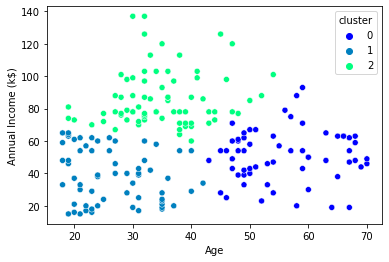

In [15]:
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='cluster',data=data2,palette='winter')

In [16]:
wcss=[]
for i in range (1,11):
    km=km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
wcss

[176108.78000000003,
 87121.56591478697,
 59492.737994932715,
 39529.88796736351,
 31659.353138717815,
 25399.02200441698,
 21882.904123503034,
 18864.876029385057,
 15976.994655875525,
 13852.683732057414]

In [18]:
##### value for cluster is 3

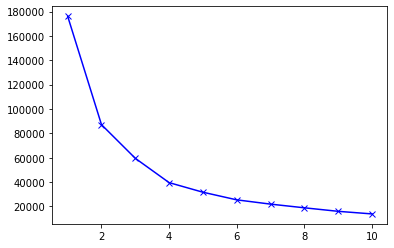

In [39]:
plt.plot(range(1,11),wcss,'bx-')

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(X_scaled,km.labels_)

0.34495768138038213

In [22]:
data2.groupby('cluster').count()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,,
0,62,62,62,62,62
1,62,62,62,62,62
2,76,76,76,76,76


In [40]:
data2.groupby('cluster').size()

cluster
0    62
1    62
2    76
dtype: int64